In [1]:
# import relevant packages
import numpy as np  
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
import Train

#### Split and Preprocess The Data

In [3]:
x_train, y_train, x_test, y_test = Train.load_mnist()

input_shape = 784
hidden_shape = [512, 512]
output_shape = 10
x_test = x_test.reshape((x_test.shape[0], -1))
y_test = to_categorical(y_test, num_classes=output_shape)

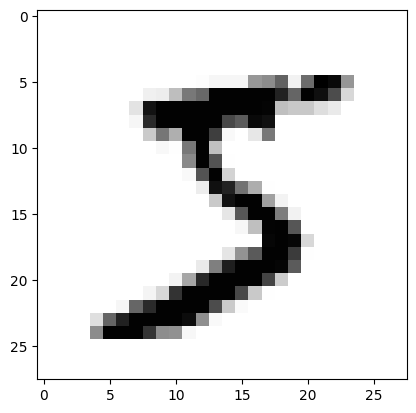

In [4]:
#display the first image of the train set to verify it's all set
first_image = x_train[0]

# Reshaping the image to its original dimensions
first_image = first_image.reshape((28, 28))
plt.imshow(first_image, cmap='Greys', interpolation='None')

## Train The MNIST model

Epoch 0 - Loss: 0.2376708517582241 - Accuracy: 0.11256666666666666
Epoch 10 - Loss: 0.09245180290172404 - Accuracy: 0.7707666666666667
Epoch 20 - Loss: 0.06201842408057484 - Accuracy: 0.8069833333333334
Epoch 30 - Loss: 0.05426027080125388 - Accuracy: 0.8262666666666667
Epoch 40 - Loss: 0.052435460892707245 - Accuracy: 0.8384
Epoch 50 - Loss: 0.04975042043289073 - Accuracy: 0.8485166666666667
Epoch 60 - Loss: 0.0470408265092226 - Accuracy: 0.859
Epoch 70 - Loss: 0.04439669940506709 - Accuracy: 0.8708
Epoch 80 - Loss: 0.040465160586128764 - Accuracy: 0.87095
Epoch 90 - Loss: 0.037378874119240346 - Accuracy: 0.8827


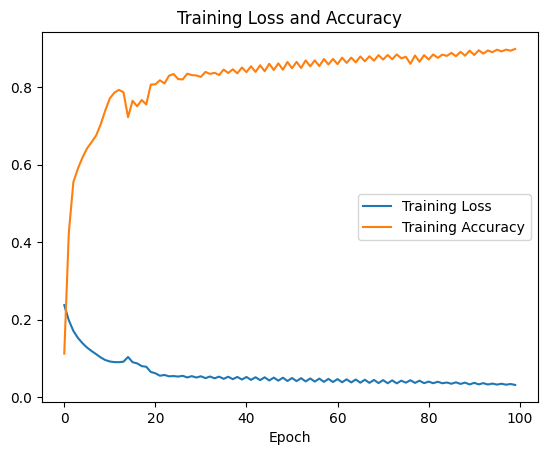

In [5]:
nn = Train.CreateModel(input_size=input_shape, output_size=output_shape, hidden_size=hidden_shape)
nn.train(x_train, y_train, initial_learning_rate=0.001, decay=0.001, n_epochs=100, plot_training_results=True)

#### Evaluate the model on the test 

In [6]:
print("Test Loss:", nn.test_loss(x_test, y_test))
print("Test Accuracy:", nn.test_accuracy(x_test, y_test))

Test Loss: 0.22401607550243316
Test Accuracy: 0.9012


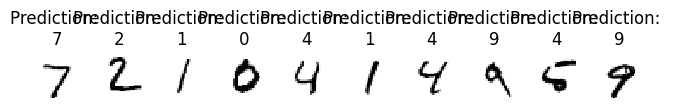

In [7]:
# display some model guesses
model_guesses = nn.get_prediction(samples=x_test)

for idx, i in enumerate([i for i in range(10)]):
# for idx, i in enumerate([0, 5, 10, 15, 20, 25]):
    plt.subplot(1, 10, idx + 1)  # Create subplots in a row
    first_image_guess = model_guesses[i]
    first_image = x_test[i]

    # Reshaping the image to its original dimensions
    first_image = first_image.reshape((28, 28))
    plt.imshow(first_image, cmap='Greys', interpolation='None')
    plt.title(f"Prediction: \n{np.argmax(first_image_guess)}")  # Set subplot title
    plt.axis('off')  # Turn off axis

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show() 

Epoch 0 - Loss: 0.2389070140177954 - Accuracy: 0.13121666666666668
Epoch 10 - Loss: 0.07524843962429398 - Accuracy: 0.8165333333333333
Epoch 20 - Loss: 0.06613975136117013 - Accuracy: 0.7918166666666666
Epoch 30 - Loss: 0.057806259242879084 - Accuracy: 0.81755
Epoch 40 - Loss: 0.056639178146734956 - Accuracy: 0.81635


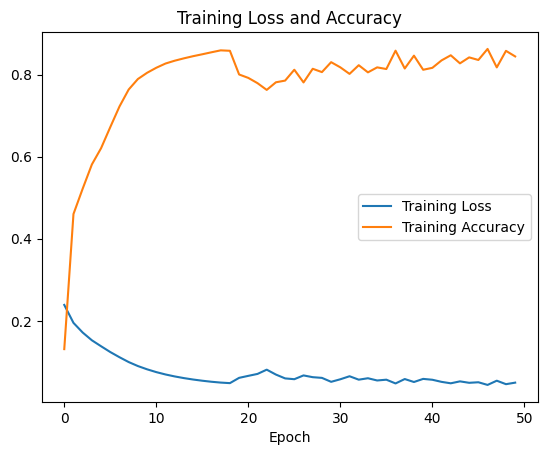

In [8]:
second_nn = Train.CreateModel(input_size=input_shape, output_size=output_shape, hidden_size=hidden_shape)
second_nn.train(x_train, y_train, initial_learning_rate=0.001, decay=0.002, n_epochs=50, plot_training_results=True)

In [9]:
print("Test Loss:", second_nn.test_loss(x_test, y_test))
print("Test Accuracy:", second_nn.test_accuracy(x_test, y_test))

Test Loss: 0.3337572815897442
Test Accuracy: 0.8521


# Private Gradient: first try

 Using Adam + cross entropy.
 For now, the privacy is not fully implemented, because the noise scale is not drove from the epsilon budget. 

In [10]:
import Train

Epoch 0 - Loss: 0.23799741579825684 - Accuracy: 0.09441666666666666
Epoch 10 - Loss: 0.19075857186542455 - Accuracy: 0.44805
Epoch 20 - Loss: 0.15448756130798136 - Accuracy: 0.53745
Epoch 30 - Loss: 0.12162453230500474 - Accuracy: 0.6497
Epoch 40 - Loss: 0.12146024113278395 - Accuracy: 0.7427


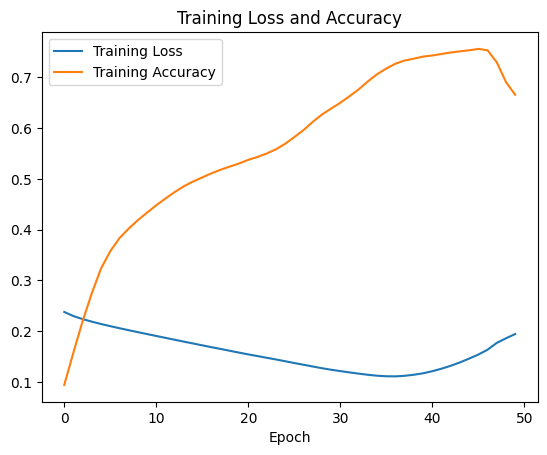

In [13]:
private_gradient = Train.CreateModel(input_size=input_shape, output_size=output_shape, hidden_size=hidden_shape, epsilon=0.01)
private_gradient.train(x_train, y_train, initial_learning_rate=0.001, decay=0.002, n_epochs=50, plot_training_results=True)

In [14]:
print("Test Loss:", private_gradient.test_loss(x_test, y_test))
print("Test Accuracy:", private_gradient.test_accuracy(x_test, y_test))

Test Loss: 0.7952339129672018
Test Accuracy: 0.6497
